Nearest Neighbor (1-NN)
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


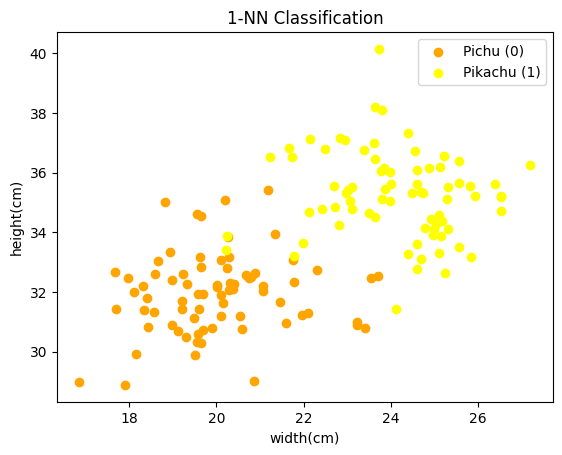

Your point (43.0, 23.0) is classified as Pikachu

KNN Classification (k=10)
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


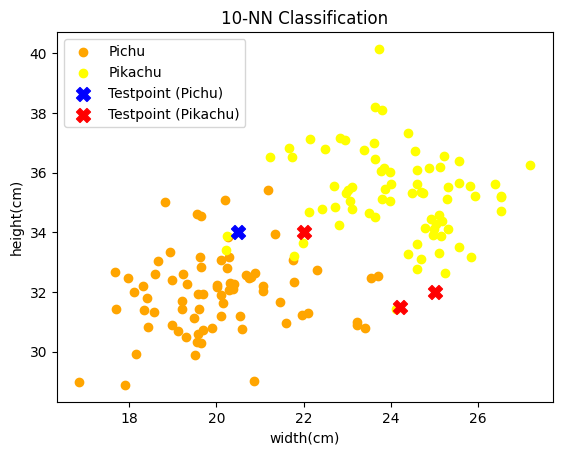

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# GRUNDUPPGIFT
# 1. läser in datan och sparar i lämplig datatstruktur
with open('datapoints.txt', 'r') as datafile:    # läser in datan från datapoints.txt
    data = datafile.read().splitlines()    # sparar datan in variabeln data och delar upp datan rad för rad i en lista
data.pop(0)    # tar bort första raden (width (cm), height (cm), label (0-pichu, 1-pikachu))

dataset = []
for line in data:
    parts = line.split(',')    # delar upp raden i delar
    w = float(parts[0])
    h = float(parts[1])
    label = parts[2].strip()    # tar bort mellanslag/radbrytningar med .strip()
    if label == '0':    # gör om 0/1 till namn direkt, för utskriften på # 6.
        label = 'Pichu'
    elif label == '1':
        label = 'Pikachu'

    dataset.append((w, h, label))

# 2. Förbereder plottlistor
pikachu_x = []    # skapar listor för pikachus och pichus bredd och längd
pikachu_y = []
pichu_x = []
pichu_y = []

for w, h, label in dataset:    # lägger in deras bredd och längd i varsina listor
    if label == 'Pikachu':
        pikachu_x.append(w)
        pikachu_y.append(h)
    else:
        pichu_x.append(w)
        pichu_y.append(h)

# 3. Läser in testpunkter
testpoints = []
with open('testpoints.txt', 'r') as testfile:
    for line in testfile.read().splitlines()[1:]:    # hoppar över första raden direkt
        line = line.split('.', 1)[1].strip(' ()')    # tar bort punkter och parenteser
        w, h = map(float, line.split(','))    # map gör om båda direkt till float
        testpoints.append((w, h))

# 4. Beräkna avstånd mellan testpunkt och träningspunkter
def distance (p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 5. Närmaste punkten till antingen pichu eller pikachu (1-NN)
def classify_nearest(test_point):    # skapar en funktion som tar testpunkt(w, h) och hittar den närmaste punkten i dataset
    nearest = None
    nearest_dist = float('inf')
    for w, h, label in dataset:
        d = distance(test_point, (w, h))
        if d < nearest_dist:
            nearest_dist = d
            nearest = label
    return nearest

# 6. Klassificerar testpunkter (1-NN) -> utskrift före diagram
print('Nearest Neighbor (1-NN)')
for tp in testpoints:
    print(f'Sample with (width, height): {tp} classified as {classify_nearest(tp)}')

# plottar 1-NN
plt.title('1-NN Classification')
plt.xlabel('width(cm)')
plt.ylabel('height(cm)')
plt.scatter(pichu_x, pichu_y, color = 'orange', label = 'Pichu (0)')    # plottar ut dem
plt.scatter(pikachu_x, pikachu_y, color = 'yellow', label = 'Pikachu (1)')
plt.legend()
plt.show()

# UPPGIFT 1
# Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass + felhantering
while True:
    try:
        w = float(input('Enter width (cm): '))
        h = float(input('Enter height (cm): '))

        if w < 0 or h < 0:
            print('Error: Width and height must be positive numbers. Try again.\n\n')
            continue

        classification = classify_nearest((w, h))
        print(f'Your point ({w}, {h}) is classified as {classification}')
        break
    except ValueError:
        print('Error: Please enter valid numeric values. Try again.\n')

# UPPGIFT 2
# Välja 10 närmaste punkterna till testpunkt (10-KNN)
def classify_knn(testpoint, k= 10):
    distances = []
    for w, h, label in dataset:
        d = distance(testpoint, (w, h))
        distances.append((d, label))
    distances.sort(key=lambda x: x[0])
    
    nearest_neighbors = [label for _, label in distances[:k]]
    if nearest_neighbors.count('Pichu') > nearest_neighbors.count('Pikachu'):
        return 'Pichu'
    else:
        return 'Pikachu'

print('\nKNN Classification (k=10)')
test_pichu_x = []
test_pichu_y = []
test_pikachu_x = []
test_pikachu_y = []

for tp in testpoints:
    classification = classify_knn(tp)
    print(f'Sample with (width, height): {tp} classified as {classification}')
    if classification == 'Pichu':
        test_pichu_x.append(tp[0])
        test_pichu_y.append(tp[1])
    else:
        test_pikachu_x.append(tp[0])
        test_pikachu_y.append(tp[1])

plt.title('10-NN Classification')
plt.xlabel('width(cm)')
plt.ylabel('height(cm)')
plt.scatter(pichu_x, pichu_y, color = 'orange', label = 'Pichu')
plt.scatter(pikachu_x, pikachu_y, color = 'yellow', label = 'Pikachu')
plt.scatter(test_pichu_x, test_pichu_y, color = 'blue', marker = 'X', s = 100, label = 'Testpoint (Pichu)')
plt.scatter(test_pikachu_x, test_pikachu_y, color = 'red', marker = 'X', s = 100, label = 'Testpoint (Pikachu)')
plt.legend()
plt.show()
